# Wallet Address Growth

Depicts the count and growth of wallets that hold the given coins and adhering to a treshold criteria. This can be either the USD value of the coin(s) (metric = *AdrBal1in\*\.Cnt*), or the share of total supply (metric = *AdrBalUSD\*\.Cnt*) held. 

To change the coins, or the wallet constrains, change the __coins__ and __metrics__ arrays down below. __measurent_window__ can also useful to change the window of growth measurement. The default is 365 days. 

The data is downloaded from [coinmetrics](https://charts.coinmetrics.io/formulas/) and saved to [data/wallets.csv]( https://github.com/bekisz/chaintelligence/data/wallets.csv)

In [1]:
import pandas as pd

fromDate = '2010-01-01'

df = pd.read_csv('data/wallets.csv', encoding = "utf-16", sep='\t')
df['Time']= pd.to_datetime(df['Time'])
df.set_index(['Time'],inplace=True, verify_integrity = True, drop = True)
df = df[fromDate:]
df.tail(2)

,BTC_Price,BTC_CapMrktCurUSD,BTC_CapRealUSD,BTC_AdrBal1in10BCnt,BTC_AdrBal1in1BCnt,BTC_AdrBal1in100MCnt,BTC_AdrBal1in10MCnt,BTC_AdrBalUSD10MCnt,BTC_AdrBalUSD1MCnt,BTC_AdrBalUSD100KCnt,...,SUSHI_AdrBal1in100MCnt,SUSHI_AdrBal1in10MCnt,SUSHI_AdrBal1in1MCnt,SUSHI_AdrBalUSD10MCnt,SUSHI_AdrBalUSD1MCnt,SUSHI_AdrBalUSD100KCnt,SUSHI_AdrBalUSD10KCnt,SUSHI_AdrBalUSD1KCnt,SUSHI_AdrBalUSD100Cnt,SUSHI_AdrBalUSD10Cnt
Time,,,,,,,,,,,,,,,,,,,,,
2023-01-01,16920.747388,3.254967e+11,3.840831e+11,18483496.5,8.624333e+06,2.843057e+06,537943.166667,3791.3,24067.833333,216441.033333,...,65036.433333,33802.900000,7280.466667,4.033333,35.1,192.333333,565.333333,2729.133333,16138.833333,47365.200000
2023-01-02,16913.721117,3.253766e+11,3.838558e+11,18485245.0,8.631498e+06,2.845133e+06,538275.300000,3789.2,24074.633333,216506.766667,...,65096.800000,33849.866667,7300.433333,3.966667,34.3,191.500000,562.000000,2711.966667,16026.766667,47237.966667


In [2]:

# ---  Coins to Analyze ----
# all
#coins = ['YFI','ZEC','ETH','ADA','ETC','LTC', 'BTC','MKR', 'BTG',"AAVE","MATICETH", "MANA", "UNI", "COMP","BAL","BAT", "SUSHI", "DOGE","1INCH", 'LINK']
# watchlist
#coins = ['ETH','BTC','MKR',"AAVE","MATICETH", "MANA", "UNI","BAL", 'LINK', 'CRV' ]
# Non-fi
#coins = ['ETH',"MANA", "BAT"]
# oldies
# coins = ['ETH','ETC','LTC', 'BTC', "DOGE", 'ADA', 'LINK','ZEC']


coins = [ 'ADA', 'ETH']

# Payment
# coins = ['XRP','XLM','ALGO']

# DEXes
# coins = ['BAL', "UNI", "SUSHI","1INCH", "CRV", 'LINK', 'YFI']

# Lending
#coins = ['COMP', 'AAVE', "MKR"]

#coins = ['ETH', 'BTC', "MATICETH", "MANA", "SUSHI","1INCH", 'CRV']

# ---------------------------------------------------------------------
# Wallets over x USDs : 
#metrics = ['AdrBalUSD1MCnt','AdrBalUSD10KCnt', 'AdrBalUSD1KCnt', 'AdrBalUSD100Cnt'] 
# Wallets over nth of total coins : 
# metrics = ['AdrBal1in10BCnt','AdrBal1in1BCnt', 'AdrBal1in100MCnt', 'AdrBal1in10MCnt']

metrics = ['AdrBal1in100MCnt'] 

#metrics = ['AdrBalUSD100Cnt', 'AdrBalUSD1KCnt','AdrBalUSD10KCnt'] 
#metrics = ['AdrBalUSD10KCnt'] 



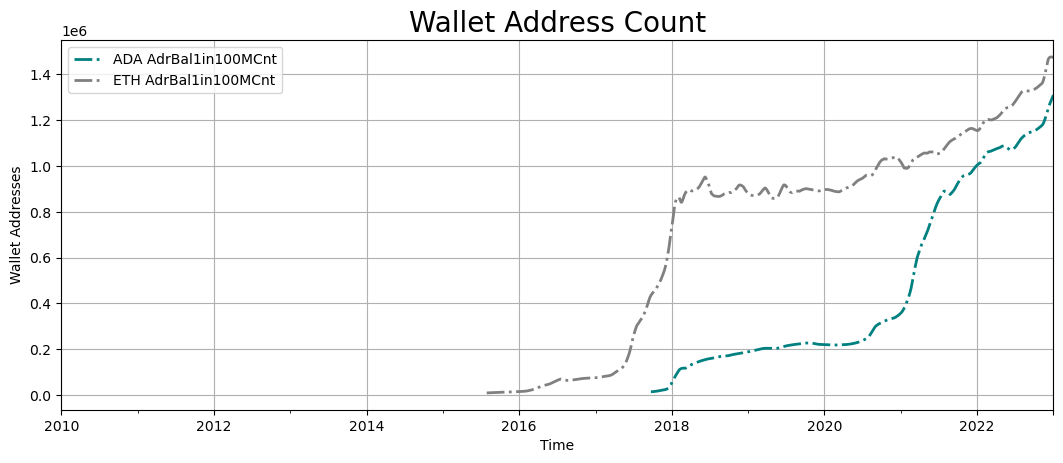

In [3]:
import matplotlib.pyplot as plt

metric_linestyles = {
    'AdrBal1in10BCnt':'-',
    'AdrBal1in1BCnt':'--',
    'AdrBal1in100MCnt':'-.',    
    'AdrBal1in10MCnt':':',    
    'AdrBalUSD1MCnt':':',
    'AdrBalUSD10KCnt':'-.',
    'AdrBalUSD1KCnt':'--',    
    'AdrBalUSD100Cnt':'-',       
}
coin_colors = {
    'BTC':'orange',
    'ETH':'grey',
    'AAVE':'purple',
    'LTC':'lightblue',
    'MKR':'lightgreen',
    'MATICETH':'blue',
    'UNI':'pink',
    'LDO':'darkred',
    'BAL':'brown',
    'CRV': 'red',
    'ETC' : 'lightgreen',
    'ADA':'teal',
    'LINK' : 'darkblue',
    'XRP' : 'black',
    'XLM' : 'grey',
    'ALGO' : 'green',
    'BTG' : 'gold',
    'BAL' : 'brown',
    'SUSHI': 'magenta',
    'COMP' : 'green',
    'DOGE': 'brown',
    'BAT': 'crimson',
    'MANA': 'deeppink',
    '1INCH': 'hotpink',
    'ZEC': 'darkgrey',
    'YFI' : 'darkorange'
    
}
coin_max_supply = {
    'BTC': 21000000,
    'ETH': 122373866, # total supply as of 2023.01.01
    'AAVE':16000000,
    'LTC': 84000000,
    'MKR': 1005577,
    'MATICETH': 10000000000, # MATIC on ETH chan only
    'UNI':1000000000,
    'LDO':1000000000,
    'BAL': 96150704,
    'CRV': 3303030299,
    'ETC' : 210000000,
    'ADA': 45000000000,
    'BIFI' :80000,
    'LINK' : 1000000000,
    'XRP' : 100* 1000000000,
    'XLM' : 50001806812,
    'ALGO' : 10*1000000000,
    'BTG' : 21000000,
    'SUSHI': 250000000,
    'COMP' : 10000000,
    'DOGE': 132670764300, # total supply as of 2023.01.01
    'BAT': 1500000000,
    'MANA': 2193539027, # total supply as of 2023.01.01
    '1INCH': 1500000000,
    'ZEC': 21000000,
    'YFI' : 36666
    
}

F = plt.gcf()
DefaultSize = F.get_size_inches()

plt.title("Wallet Address Count", fontsize=20)
plt.ylabel("Wallet Addresses")
for metric in metrics:
    for coin in coins: 
        df[coin + '_' + metric].plot(c=coin_colors[coin],label=coin + ' ' + metric,linewidth=2, ls = metric_linestyles[metric])

plt.grid()
plt.legend(loc='upper left')
#plt.ylim((0,25000))
F.set_size_inches( (DefaultSize[0]*2, DefaultSize[1]*1) )


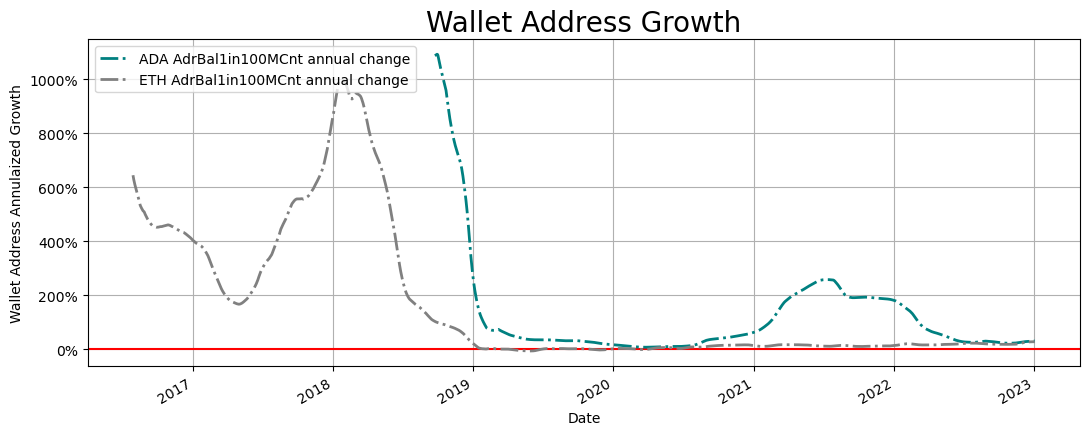

In [4]:
import matplotlib.ticker as mtick
pd.options.mode.chained_assignment = None  # default='warn'

measurent_window = 365 # days 
plt.axhline(y = 0, color = 'r', linestyle = '-')
for coin in coins: 
    for metric in metrics:
        df.loc(axis=1)[coin + '_'+ metric + '_annual_change'] = df.loc(axis=1)[coin + '_'+ metric].pct_change(axis=0, freq= pd.Timedelta(measurent_window, "d")) * (365/measurent_window)
        ax=df[coin + '_' + metric + '_annual_change'].plot(c=coin_colors[coin],label=coin + ' ' + metric + ' annual change',linewidth=2, ls = metric_linestyles[metric])

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0,decimals=0))

plt.title("Wallet Address Growth", fontsize=20)
plt.ylabel("Wallet Address Annulaized Growth")
plt.xlabel('Date')
F = plt.gcf()
plt.grid()
plt.legend(loc='upper left')
#plt.ylim((0,1))
F.set_size_inches( (DefaultSize[0]*2, DefaultSize[1]*1) )